## Batch Size Speed

In [10]:
%reload_ext autoreload
%autoreload 2

In [7]:
import autorootcwd

from src.train import train_model
from src.data.dataset import FixedLengthChordDataset
import torch
from src.models.ismir2017 import ISMIR2017ACR

In [22]:
dataset = FixedLengthChordDataset()

train_loaders = [(batch_size, torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)) for batch_size in [32, 64, 128, 256, 512]]

model = ISMIR2017ACR(input_features=dataset.n_bins, num_classes=25)

In [ ]:
import time

batch_speeds = []
batch_sizes = []

for batch_size, train_loader in train_loaders:
    print(f"Training with batch size {batch_size}")
    batch_sizes.append(batch_size)

    # Time 1 epoch
    start = time.time()
    train_model(
        model,
        train_loader,
        num_epochs=1,
        val_loader=None,
        do_validation=False,
        lr=0.001,
        save_model=False,
    )
    end = time.time()
    batch_speeds.append(end - start)

Training with batch size 32
Using device: mps


100%|██████████| 1/1 [00:27<00:00, 27.65s/it]



Epoch 1/1, Train Loss: 3.0446
Training with batch size 64
Using device: mps


100%|██████████| 1/1 [00:21<00:00, 21.93s/it]



Epoch 1/1, Train Loss: 2.9785
Training with batch size 128
Using device: mps


100%|██████████| 1/1 [00:24<00:00, 24.49s/it]



Epoch 1/1, Train Loss: 2.8453
Training with batch size 256
Using device: mps


100%|██████████| 1/1 [01:57<00:00, 117.98s/it]



Epoch 1/1, Train Loss: 2.7338
Training with batch size 512
Using device: mps


  0%|          | 0/1 [00:00<?, ?it/s]

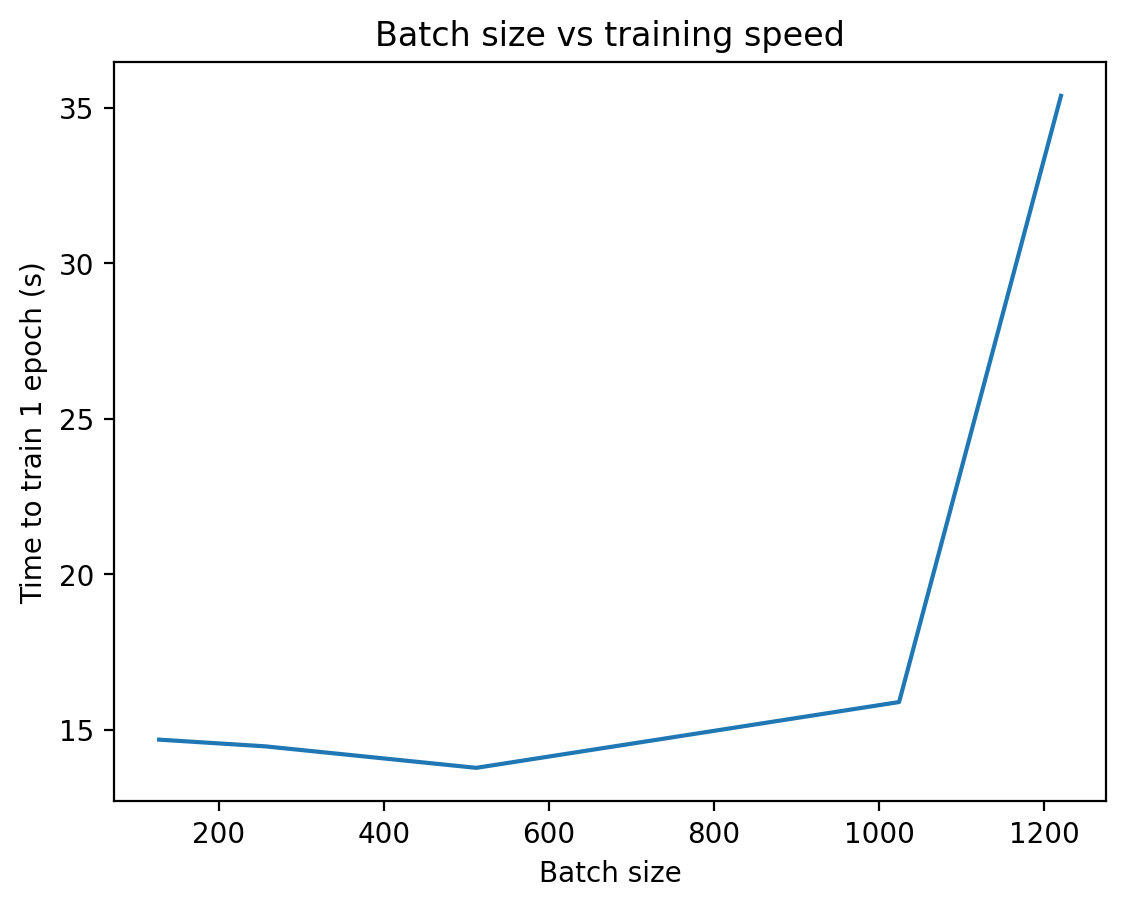

In [19]:
# Plot the batch speed vs batch size

import matplotlib.pyplot as plt

plt.plot(batch_sizes, batch_speeds)
plt.xlabel("Batch size")
#  Log scale for batch size
plt.ylabel("Time to train 1 epoch (s)")
plt.title("Batch size vs training speed")
plt.show()